In [30]:
import scanpy as sc
import pandas as pd
import numpy as np

In [153]:
adata = sc.read_10x_mtx('C:/Users/aadit/OneDrive - IIT Delhi/Single Cell Sequencing/New Folder (3)', var_names = 'gene_symbols', cache = True)

In [154]:
adata #vars are genes, which are 13136 in number
      # obs are cells, which are 13624 in number

AnnData object with n_obs × n_vars = 13624 × 13136
    var: 'gene_ids'

In [155]:
adata.var

,gene_ids
MTATP6P1,Unnamed: 0
LINC01128,NaN
SAMD11,NaN
NOC2L,NaN
KLHL17,NaN
...,...
MT-ND4L,NaN
MT-ND4,NaN
MT-ND5,NaN
MT-ND6,NaN


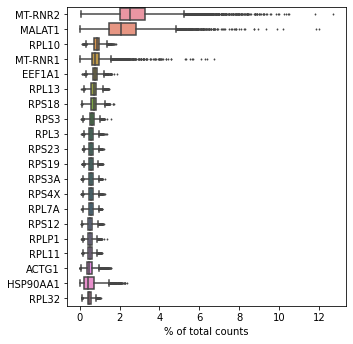

In [156]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [157]:
sc.pp.filter_cells(adata, min_genes=200)

In [158]:
adata.obs['n_genes'].min()

1843

In [159]:
adata.n_obs

13624

In [160]:
sc.pp.filter_genes(adata, min_cells=3)

In [161]:
adata.var['n_cells'].min()

283

In [162]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [163]:
adata.var

,gene_ids,n_cells,mt
MTATP6P1,Unnamed: 0,8102,False
LINC01128,NaN,1646,False
SAMD11,NaN,2736,False
NOC2L,NaN,5821,False
KLHL17,NaN,980,False
...,...,...,...
MT-ND4L,NaN,11509,True
MT-ND4,NaN,13617,True
MT-ND5,NaN,11728,True
MT-ND6,NaN,4830,True


In [164]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

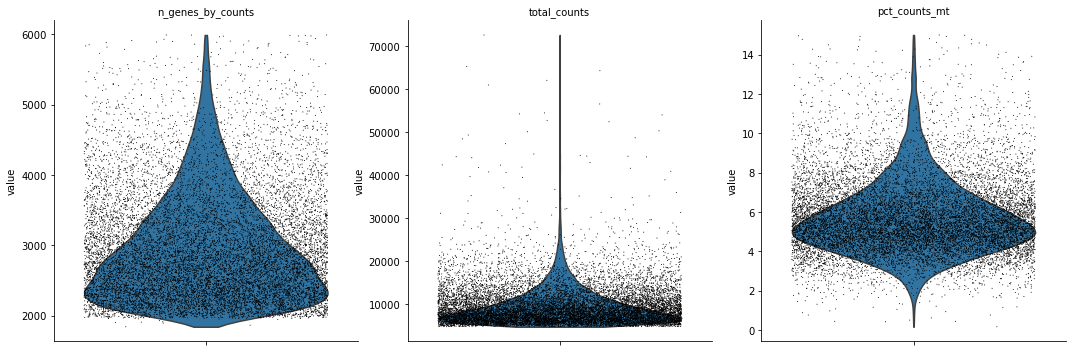

In [165]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

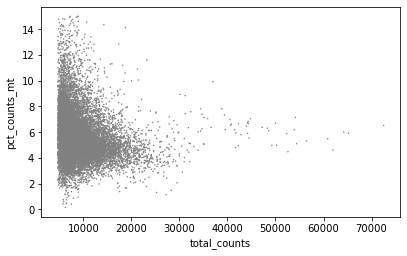

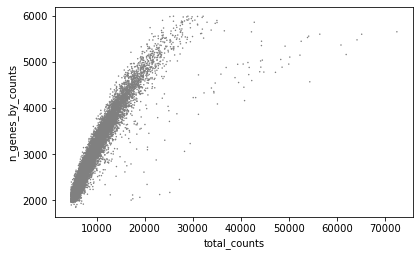

In [166]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [167]:
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MTATP6P1,Unnamed: 0,8102,False,8102,1.053068,40.531415,14347.0
LINC01128,NaN,1646,False,1646,0.131973,87.918379,1798.0
SAMD11,NaN,2736,False,2736,0.299472,79.917792,4080.0
NOC2L,NaN,5821,False,5821,0.592557,57.273928,8073.0
KLHL17,NaN,980,False,980,0.076629,92.806812,1044.0
...,...,...,...,...,...,...,...
MT-ND4L,NaN,11509,True,11509,2.357237,15.524075,32115.0
MT-ND4,NaN,13617,True,13617,22.601732,0.051380,307926.0
MT-ND5,NaN,11728,True,11728,2.689078,13.916618,36636.0
MT-ND6,NaN,4830,True,4830,0.487449,64.547857,6641.0


In [168]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]

In [169]:
adata = adata[adata.obs.pct_counts_mt < 8, :]

In [170]:
adata

View of AnnData object with n_obs × n_vars = 11887 × 13136
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [171]:
sc.pp.normalize_total(adata, target_sum=1e4)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [172]:
sc.pp.log1p(adata)

In [173]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [174]:
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
MTATP6P1,Unnamed: 0,8102,False,8102,1.053068,40.531415,14347.0,False,0.713464,0.282430,-0.265411
LINC01128,NaN,1646,False,1646,0.131973,87.918379,1798.0,False,0.131271,0.227796,-0.353971
SAMD11,NaN,2736,False,2736,0.299472,79.917792,4080.0,True,0.286976,0.727502,1.299273
NOC2L,NaN,5821,False,5821,0.592557,57.273928,8073.0,False,0.485406,0.222228,-0.401420
KLHL17,NaN,980,False,980,0.076629,92.806812,1044.0,False,0.081060,0.244746,-0.297892
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,NaN,11509,True,11509,2.357237,15.524075,32115.0,False,1.212436,0.390854,-0.334998
MT-ND4,NaN,13617,True,13617,22.601732,0.051380,307926.0,False,3.137020,1.222464,-0.386230
MT-ND5,NaN,11728,True,11728,2.689078,13.916618,36636.0,False,1.286903,0.423729,-0.285737
MT-ND6,NaN,4830,True,4830,0.487449,64.547857,6641.0,False,0.418350,0.380650,-0.024807


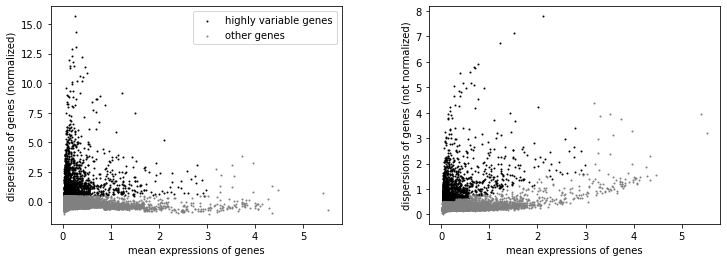

In [175]:
sc.pl.highly_variable_genes(adata)

In [178]:
adata = adata[:, adata.var.highly_variable]

In [179]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [180]:
sc.pp.scale(adata, max_value=10)

In [181]:
sc.tl.pca(adata, svd_solver='arpack')

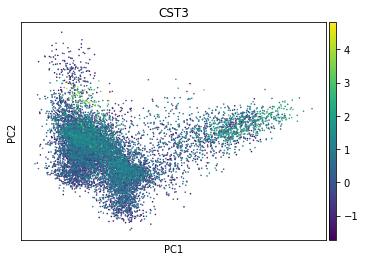

In [182]:
sc.pl.pca(adata, color='CST3')

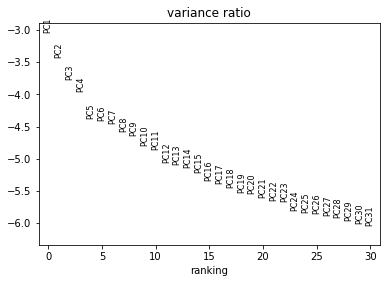

In [183]:
sc.pl.pca_variance_ratio(adata, log=True)

In [186]:
!mkdir write
results_file = 'write/this.h5ad'
adata.write(results_file)

In [187]:
adata

AnnData object with n_obs × n_vars = 11887 × 1581
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'